In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
#from KaggleAux import predict as ka


In [27]:
df = pd.read_csv("Kaggle/train.csv")

df.isnull().sum()

        


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df=df.drop(['Ticket', 'Cabin'],axis=1)
df = df.dropna()

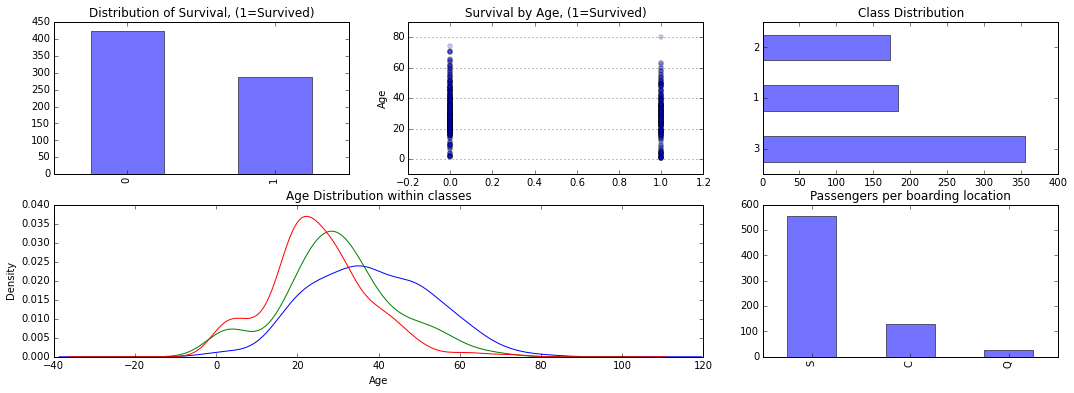

In [53]:
fig = plt.figure(figsize=(18,6),dpi=1600)
alpha_scatterplot = 0.2
alpha_bar_chart=0.55

ax1 = plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha =alpha_bar_chart)
plt.title("Distribution of Survival, (1=Survived)")



ax2 = plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived,df.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True,which='major',axis='y')
plt.title("Survival by Age, (1=Survived)")


ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
#ax3.set_ylim(-1,len(df.Pclass.value_counts()))
plt.title("Class Distribution")


ax4 = plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.title("Age Distribution within classes")

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind="bar", alpha = alpha_bar_chart)
plt.title("Passengers per boarding location")

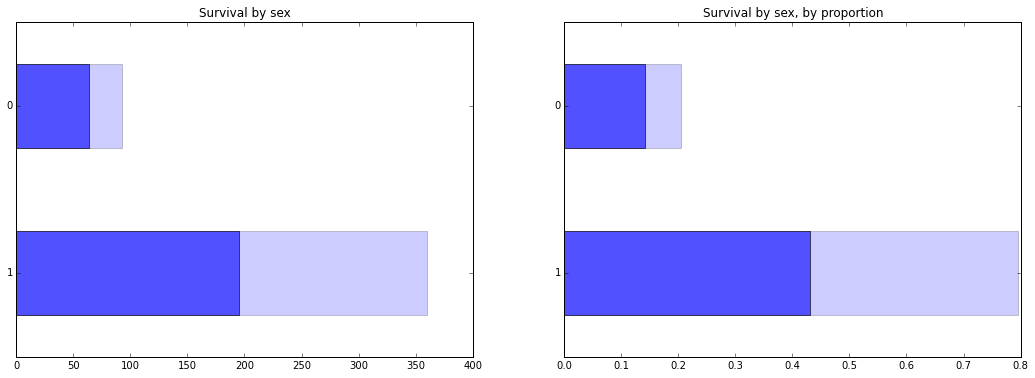

In [62]:
fig  = plt.figure(figsize=(18,6))
fig.add_subplot(121)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='barh',alpha = 0.2,label="Male")
df.Survived[df.Sex == 'female'].value_counts().plot(kind='barh',alpha = 0.6,label="Female")
plt.title("Survival by sex")



fig.add_subplot(122)
(df.Survived[df.Sex=='male'].value_counts()/float(df.Sex[df.Sex=='male'].size)).plot(kind="barh",alpha=0.2)
(df.Survived[df.Sex=='female'].value_counts()/float(df.Sex[df.Sex=='male'].size)).plot(kind="barh",alpha=0.6)
plt.title("Survival by sex, by proportion")